In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from vae import VAE

%matplotlib inline

In [4]:
def get_dataloader(dataset, batch_size=64, train=False):
    transform = transforms.Compose([
    transforms.ToTensor(),
    ])

    data = dataset(
        root='../input/data',
        train=train,
        download=True,
        transform=transform
    )

    loader = DataLoader(
        data,
        batch_size=batch_size,
        shuffle=False
    )
    return loader

In [5]:
def load_model(model, checkpoint_filepath):
    checkpoint = torch.load(checkpoint_filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

def get_reconstructions(model, data_loader):
    sample, _ = next(iter(val_loader))
    reconstruction, _ , _ = model(sample)
    
    return sample , reconstruction

In [6]:
def image_from_tensor(tensor, index):
    return tensor[index].detach().numpy().reshape(28, -1)

In [7]:
def plot_reconstructions(num_samples, samples, reconstructions):
    fig = plt.figure(figsize = (2 * num_samples,4))

    for sample_index in range(num_samples):
        image = image_from_tensor(samples, sample_index)
        reconstructed_image = image_from_tensor(reconstructions, sample_index)
        fig.add_subplot(2,num_samples,sample_index + 1)
        plt.imshow(image)
        fig.add_subplot(2,num_samples,num_samples+sample_index + 1)
        plt.imshow(reconstructed_image)

    plt.show()

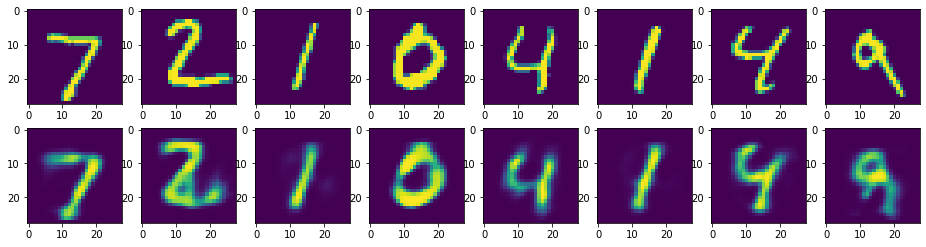

In [8]:
model = VAE(input_dim = 784)
checkpoint_file = "weights.pt"

load_model(model, checkpoint_file)

val_loader = get_dataloader(datasets.MNIST, train=False)
samples, reconstructions = get_reconstructions(model, val_loader)

num_samples = 8

plot_reconstructions(num_samples, samples, reconstructions)

In [7]:
train_loader = get_dataloader(datasets.MNIST, train=True)
train_samples, train_reconstructions = get_reconstructions(model, train_loader)

